# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [115]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [116]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [117]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [118]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [119]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

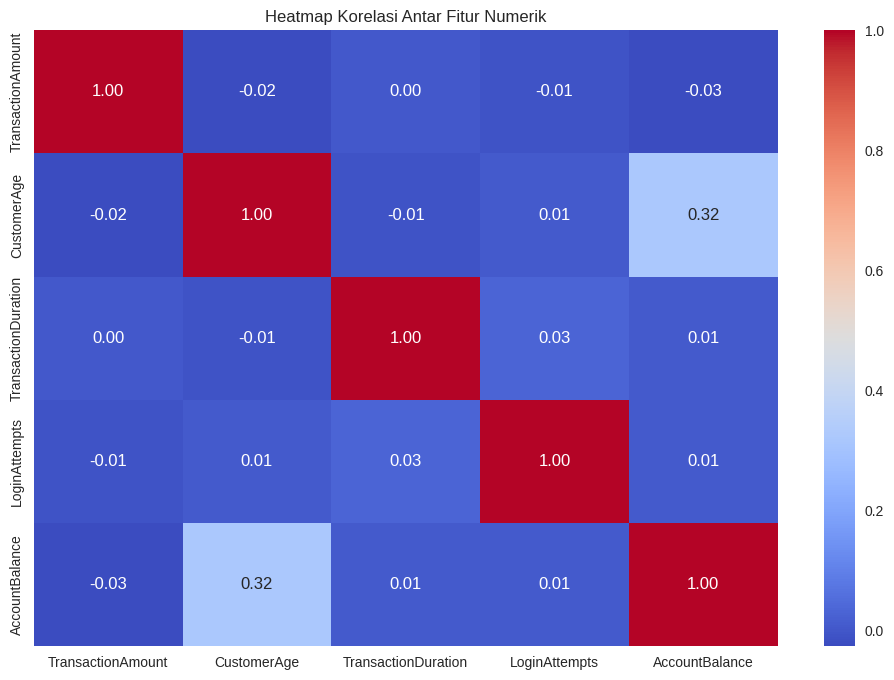

In [120]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

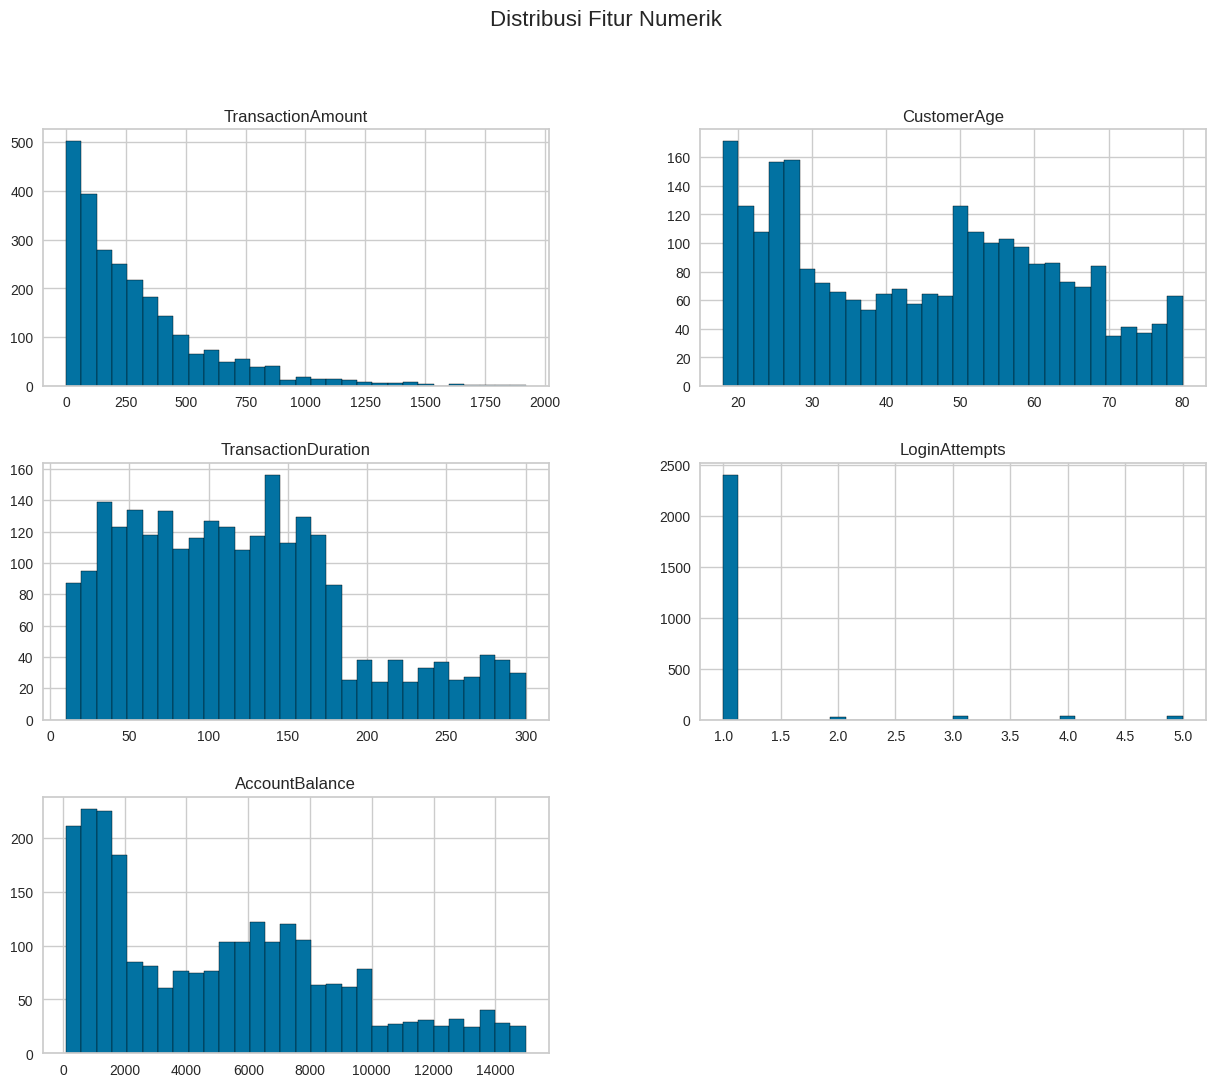

In [121]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_df.hist(figsize=(15,12), bins=30, edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik", size=16)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

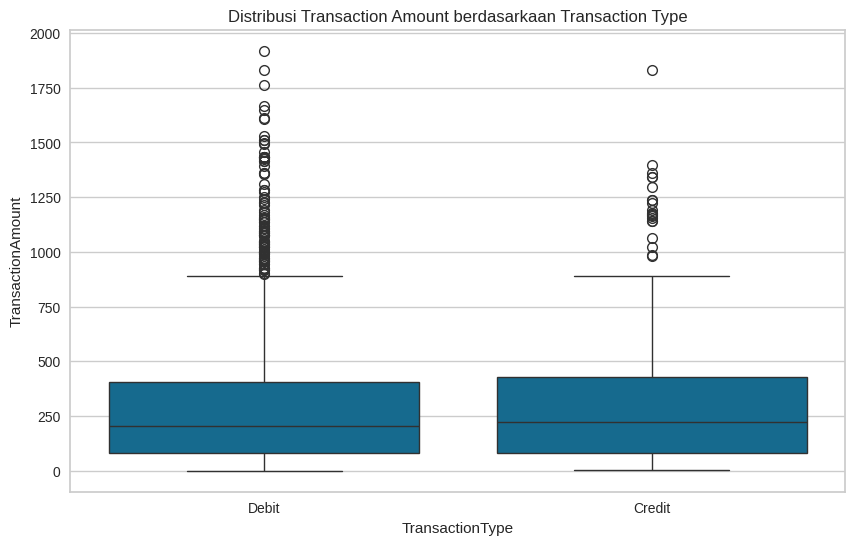

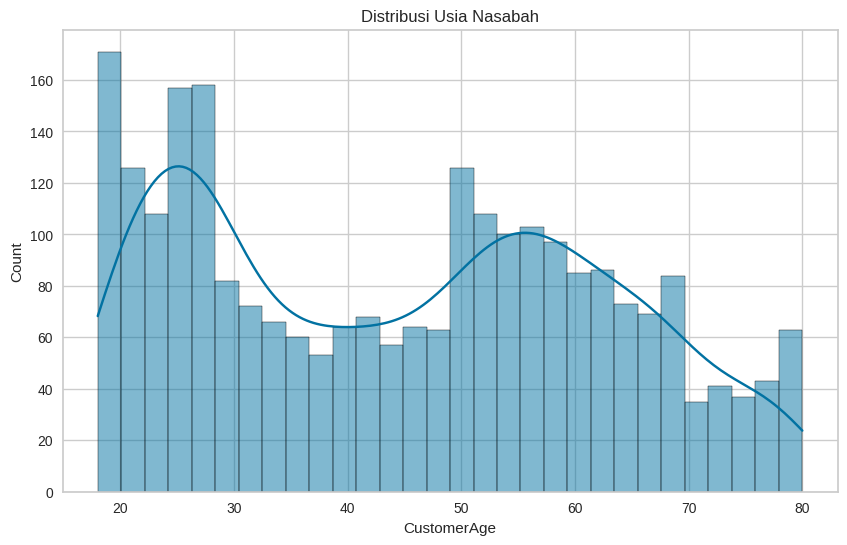

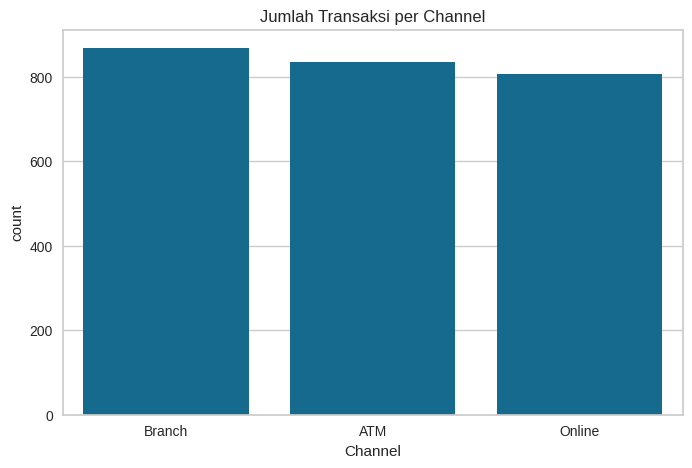

In [122]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
## Distribusi Transaction Amount berdasarkan Tipe Transaksi
plt.figure(figsize=(10,6))
sns.boxplot(x="TransactionType", y="TransactionAmount", data=df)
plt.title("Distribusi Transaction Amount berdasarkaan Transaction Type")
plt.show()

## Distribusi Usia Nasabah
plt.figure(figsize=(10,6))
sns.histplot(df["CustomerAge"], bins=30, kde=True)
plt.title("Distribusi Usia Nasabah")
plt.show()

## Jumlah Transaksi per Channel
plt.figure(figsize=(8,5))
sns.countplot(x="Channel", data=df, order=df["Channel"].value_counts().index)
plt.title("Jumlah Transaksi per Channel")
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [123]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [124]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [125]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler
# Identifikasi kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scaling dengan MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [126]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "MerchantID", "IP Address"])

In [127]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
sns.categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in sns.categorical_cols:
  df[col] = le.fit_transform(df[col])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [128]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [129]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col] = df[col].fillna(df[col].median())
  else:
    df.col = df[col].fillna(df[col].mode()[0])

In [130]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [131]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df["TransactionAmount"].quantile(0.25)
Q3 = df["TransactionAmount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["TransactionAmount"] >= lower_bound) & (df["TransactionAmount"] <= upper_bound)]

In [132]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Bining Data pada CustomerAge dan AccountBalance
## CustomerAge >> kategori: 'Young', 'Adult', 'Senior'
df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=[0, 25, 50, 100], labels=["Young", "Adult", "Senior"])

## AccountBalance >> kategori: 'Low', 'Medium', 'High'
df["BalanceGroup"] = pd.cut(df["AccountBalance"], bins=[-0.01, 0.33, 0.66, 1.0], labels=["Low", "Medium", "High"])

# Encode hasil binning dengan LabelEncoder
le = LabelEncoder()
df["AgeGroup"] = le.fit_transform(df["AgeGroup"])
df["BalanceGroup"] = le.fit_transform(df["BalanceGroup"])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,2
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,0,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [133]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.132555,1249.758017,0.786756,21.279050,1.010829,0.430076,1.528113,0.377291,0.030508,0.338435,180.855060,0.021658,1.243648
std,0.112426,724.827548,0.439137,12.383373,0.828583,0.285457,1.150426,0.240561,0.148538,0.260681,103.671696,0.145593,0.650149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040993,625.000000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.095959,92.000000,0.000000,1.000000
50%,0.104010,1243.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000,0.000000,1.000000
75%,0.193454,1880.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506899,271.000000,0.000000,2.000000
max,0.467223,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,1.000000,2.000000


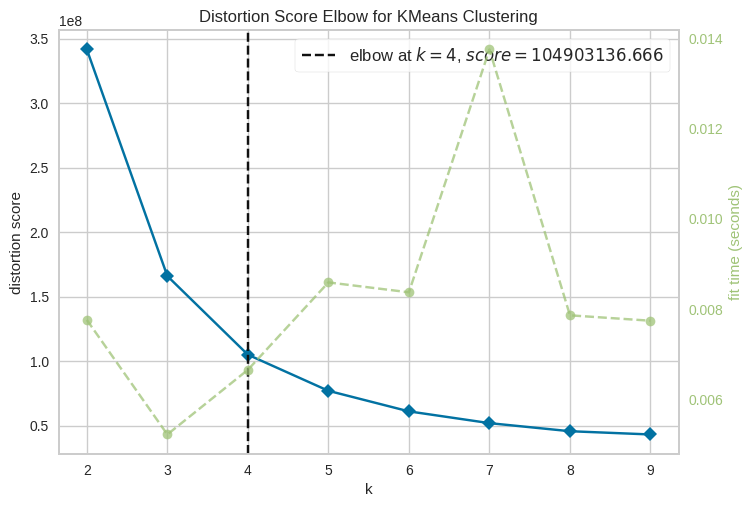

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [135]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [136]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [137]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = model_kmeans.labels_
sil_score = silhouette_score(df, labels)

print("Silhouette Score:", sil_score)

Silhouette Score: 0.5414316364846835


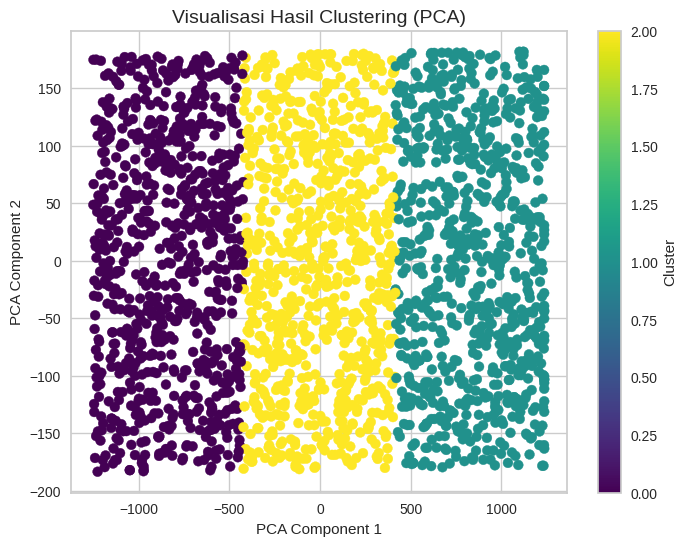

In [138]:
# Membuat visualisasi hasil clustering
# Reduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Mengambil label cluster dari model
labels = model_kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis', s=50)
plt.title("Visualisasi Hasil Clustering (PCA)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [139]:
# Membangun model menggunakan PCA.
pca = PCA(n_components = 2)
pca_data =  pca.fit_transform(df)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_kmeans_pca = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(data_final)

KMeans(n_clusters=3, random_state=42)

In [140]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [141]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby(model_kmeans.labels_).agg(['mean', 'min', 'max'])

TransactionAmount                     TransactionDate              \
               mean       min       max            mean   min   max   
0          0.131737  0.000313  0.457759      412.817610     0   824   
1          0.130235  0.000000  0.467223     2087.458955  1662  2485   
2          0.135692  0.000031  0.463809     1239.603491   825  1661   

  TransactionType           Location  ... AccountBalance  \
             mean min max       mean  ...            max   
0        0.803774   0   2  20.885535  ...       0.997633   
1        0.776119   0   2  21.573383  ...       1.000000   
2        0.780549   0   2  21.374065  ...       0.997144   

  PreviousTransactionDate           AgeGroup         BalanceGroup          
                     mean min  max      mean min max         mean min max  
0              184.481761   0  360  0.018868   0   1     1.232704   0   2  
1              181.060945   0  360  0.021144   0   1     1.248756   0   2  
2              177.053616   0  360  0.024938   0   1     1.249377   0   2  

[3 rows x 39 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah dengan transaksi kecil & saldo rendah)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
    - **TransactionAmount** = 0.1317

    - **PreviousTransactionDate** = 184.48
    - **AgeGroup** = 0.0189
    - **BalanceGroup** = 1.2327
  - **Analisis:** Cluster ini terdiri dari nasabah dengan daya beli yang rendah, mempunyai saldo yang cenderung kecil dan mayoritas berada pada kelompok usia muda yang jarang melakukan login maupun transaksi besar. Strategi yang tepat adalah menawarkan produk tabungan reguler, rekening pelajar atau mahasiswa, serta promosi biaya administrasi dengan biaya rendah untuk meningkatkan loyalitas.
2. **Cluster 1: (Nasabah aktif bertransaksi dengan saldo menengah)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
    - **TransactionAmount** = 0.1302
    - **PreviousTransactionDate** = 181.06
    - **AgeGroup** = 0.0211
    - **BalanceGroup** = 1.2488
  - **Analisis:** Cluster ini terdiri dari nasabah yang memiliki frekuensi transaksi yang cukup aktif (TransactionDate tinggi dengan rata-rata 2087.45) dengan saldo menengah. Rata-rata usia sedikit lebih tinggi jika dibandingkan dengan cluster 0, dan nasabah di cluster ini lebih stabil dalam transaksi. Sehingga rekomendasi pada cluster nasabah ini adalah produk ideal menengah seperti kartu kredit entry-level, pinjaman konsumtif, serta program reward loyalitas.
3.  **Cluster 2: (Nasabah premium dengan transaksi besar dan saldo tinggi)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
    - **TransactionAmount** = 0.1357
    - **PreviousTransactionDate** = 177.05
    - **AgeGroup** = 0.0249
    - **BalanceGroup** = 1.2494
  - **Analisis:** Nasabah cluster ini mempunyai daya beli lebih tinggi dan saldo akun cukup stabil. Rentang usia lebih matang dibandingkan dengan nasabah Cluster 0 dan 1, sehingga cocok ditawarkan produk premium seperti investasi, reksa dana, wealth management (asuransi), atau layanan proritas.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [142]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = model_kmeans.labels_

In [143]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [144]:
# Tentukan kolom numerik
numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup,Target
0,14.09,680,1,36,0,253.225806,0,1.979310,101.25,38.883575,105,0,2,0
1,376.24,1178,1,15,0,243.870968,0,2.806897,101.25,74.919387,192,0,0,2
2,126.29,1262,1,23,2,14.677419,3,1.634483,101.25,22.255516,41,0,1,2
3,184.50,818,1,33,2,47.419355,3,1.206897,101.25,53.290273,163,0,2,0
4,13.45,1939,0,1,2,136.290323,3,3.593103,101.25,48.540649,16,0,2,1


In [145]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup', 'BalanceGroup']
encoders = {}

# menyimpan encoder tiap kolom
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le

# inverse transform kolom kategorikal
for col in categorical_cols:
  le = encoders[col]
  df[col] = le.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup,Target
0,14.09,680,1,36,0,253.225806,0,1.979310,101.25,38.883575,105,0,2,0
1,376.24,1178,1,15,0,243.870968,0,2.806897,101.25,74.919387,192,0,0,2
2,126.29,1262,1,23,2,14.677419,3,1.634483,101.25,22.255516,41,0,1,2
3,184.50,818,1,33,2,47.419355,3,1.206897,101.25,53.290273,163,0,2,0
4,13.45,1939,0,1,2,136.290323,3,3.593103,101.25,48.540649,16,0,2,1


In [146]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
df.groupby('Target').agg(
    {
        # fitur numerik >> mean, min, max
        'TransactionAmount': ['mean', 'min', 'max'],
        'AccountBalance': ['mean', 'min', 'max'],
        'CustomerAge': ['mean', 'min', 'max'],
        'TransactionDuration': ['mean', 'min', 'max'],
        'LoginAttempts': ['mean', 'min', 'max'],

        # fitur kategorikal >> mode
        'TransactionType': pd.Series.mode,
        'Location': pd.Series.mode,
        'Channel': pd.Series.mode,
        'CustomerOccupation': pd.Series.mode
    }
)

TransactionAmount               AccountBalance                       \
                    mean   min     max           mean        min       max   
Target                                                                       
0             253.042818  0.86  878.63      38.970523  18.003959  79.85326   
1             250.161667  0.26  896.79      39.425230  18.000000  80.00000   
2             260.632606  0.32  890.24      38.552009  18.069724  79.82292   

       CustomerAge              TransactionDuration                 \
              mean   min    max                mean  min       max   
Target                                                               
0       129.565429  10.0  300.0            2.475047  1.0  4.986207   
1       134.783542  10.0  300.0            2.531360  1.0  5.000000   
2       139.772142  10.0  300.0            2.520733  1.0  4.986207   

       LoginAttempts                   TransactionType Location Channel  \
                mean     min       max            mode     mode    mode   
Target                                                                    
0         686.027516  101.25  14977.99               1       24       1   
1         549.957643  101.25  14977.99               1        7       1   
2         430.504532  101.25  14977.99               1       22       1   

       CustomerOccupation  
                     mode  
Target                     
0                       3  
1                       3  
2                       2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah dengan transaksi sedang & login tertinggi)**:
 <Sebelum inverse> <Setelah inverse>
  - **TransactionAmount**: mean = 0.1317 | min = 0.86 | max = 878.63
  - **AccountBalance**: mean = 38.97 | min = 18.00 | max = 79.85
  - **CustomerAge**: mean = 129.57 | min = 10 | max = 300
  - **TransactionDuration**: mean = 2.48 | min = 1.0 | max = 4.99
  - **LoginAttempts**: mean = 686.03 | min = 101.25 | max = 14977.99
  - **TransactionType**: 1
  - **Location:** 24
  - **Channel:** 1
  - **CustomerOccupation:** 3
  - **Analisis:** Cluster ini adalah nasabah bertransaksi sedang, banyak mahasiswa/usia muda. Tetapi jumla login tertinggi, yang artinya mereka sangat aktif secara digital. Sehingga cocok ditawarkan produk digital banking, m-banking dengan berbagai promo transaksi online, serta reward berbasis penggunaan aplikasi.
2. **Cluster 1: (Nasabah dengan transaksi stabil dan login menengah)**:
 <Sebelum inverse> <Setelah inverse>
  - **TransactionAmount**: mean = 250.16 | min = 0.26 | max = 896.79
  - **AccountBalance**: mean = 39.43 | min = 10| max = 80.00
  - **CustomerAge**: mean = 134.78 | min = 10 | max = 300
  - **TransactionDuration**: mean = 2.53 | min = 1.0 | max = 5.00
  - **LoginAttempts**: mean = 549.96 | min = 101.25 | max = 14977.99
  - **TransactionType**: 1
  - **Location:** 7
  - **Channel:** 1
  - **CustomerOccupation:** 3
  - **Analisis:** Nasabah cluster 1 mempunyai rata-rata transaksi hampir sama dengan cluster 0 dan cukup stabil. Tapi, saldo sediki lebih tinggi dan usia sedikit lebih tua, serta LoginAttempts yang lebih rendah daripada nasabah cluster 0. Sehingga cocok ditawarkan produk perbankan menengah seperti kartu kredit entry-level, tabungan berjangka, dan peminjaman ringan untuk kebutuhan yang konsumtif.
3.  **Cluster 2: (Nasabah premium dengan transaksi terbesar & slogin rendah)**:
 <Sebelum inverse> <Setelah inverse>
  - **TransactionAmount**: mean = 260.63 | min = 0.32 | max = 890.24
  - **AccountBalance**: mean = 38.55 | min = 18.07| max = 79.82
  - **CustomerAge**: mean = 139.77 | min = 10 | max = 300
  - **TransactionDuration**: mean = 2.52 | min = 1.0 | max = 4.99
  - **LoginAttempts**: mean = 430.50 | min = 101.25 | max = 14977.99
  - **TransactionType**: 1
  - **Location:** 22
  - **Channel:** 1
  - **CustomerOccupation:** 2
  - **Analisis:** Nasabah cluster 2 rata-rata mempunyai nominal transaksi tertinggi jika dibandingkan dengan dua cluster lainnya. Namun, LoginAttempts lebih rendah serta usia nasabah juga lebih matang. Sehingga cocok ditawarkan produk premium seperti invertasi, reksa dana, asuransi, atau layanan prioritas.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [147]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = model_kmeans.labels_
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup,Target
0,14.09,680,1,36,0,253.225806,0,1.979310,101.25,38.883575,105,0,2,0
1,376.24,1178,1,15,0,243.870968,0,2.806897,101.25,74.919387,192,0,0,2
2,126.29,1262,1,23,2,14.677419,3,1.634483,101.25,22.255516,41,0,1,2
3,184.50,818,1,33,2,47.419355,3,1.206897,101.25,53.290273,163,0,2,0
4,13.45,1939,0,1,2,136.290323,3,3.593103,101.25,48.540649,16,0,2,1


In [148]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.